<a href="https://colab.research.google.com/github/StringCGE/Colab_Practica_KNN_ANN_SocialNetwork_y_rna/blob/main/TallerCientoquiniento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deber

## Metodos

### Clases

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score, recall_score, jaccard_score, roc_curve, auc
from sklearn.calibration import calibration_curve
class ClassificationMetrics:
    def __init__(self, y_true, y_pred, prob_pos=None, model=None, clases=[0,1]):
        self.y_true = y_true
        self.y_pred = y_pred
        self.prob_pos = prob_pos
        self.model = model
        self.clases = clases
        self.results = None  # Aquí almacenaremos los resultados calculados
    def calculate_confusion_matrix(self):
        return confusion_matrix(self.y_true, self.y_pred)
    def calculate_accuracy(self):
        return accuracy_score(self.y_true, self.y_pred)
    def calculate_classification_report(self):
        return classification_report(self.y_true, self.y_pred)
    def calculate_auc_roc(self):
        return roc_auc_score(self.y_true, self.y_pred)
    def calculate_auc_pr(self):
        return average_precision_score(self.y_true, self.y_pred)
    def calculate_f1_score(self):
        return f1_score(self.y_true, self.y_pred)
    def calculate_balanced_accuracy(self):
        return balanced_accuracy_score(self.y_true, self.y_pred)
    def calculate_cohen_kappa(self):
        return cohen_kappa_score(self.y_true, self.y_pred)
    def calculate_calibration_curve(self):
        if self.model is not None:
            if self.prob_pos is None:
                self.prob_pos = self.model.predict_proba(self.y_pred)[:, 1]
            return self._calculate_calibration_curve()
        return None
    def calculate_sensitivity_specificity(self):
        sensitivity = recall_score(self.y_true, self.y_pred)
        specificity = self._calculate_specificity()
        return sensitivity, specificity
    def calculate_kl_divergence(self):
        return self._calculate_kl_divergence()
    def calculate_j_index(self):
        return jaccard_score(self.y_true, self.y_pred)
    def calculate_roc_curve(self):
        fpr, tpr, _ = roc_curve(self.y_true, self.y_pred)
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc
    def calculate_calibration_curve(self):
      prob_true, prob_pred = calibration_curve(self.y_true, self.y_pred, n_bins=10)
      return prob_true, prob_pred
    # def _calculate_calibration_curve(self):
    #     y_true_bin = self.y_true  # Asegúrate de que y_true es un array 1D binario (0 o 1)
    #     prob_pos_bin = self.prob_pos  # Asegúrate de que prob_pos es un array 1D de probabilidades
    #     prob_true, prob_pred = calibration_curve(y_true_bin, prob_pos_bin, n_bins=10)
    #     return prob_true, prob_pred
    def _calculate_specificity(self):
        sensitivity = recall_score(self.y_true, self.y_pred)
        specificity = balanced_accuracy_score(self.y_true, self.y_pred, adjusted=True) - sensitivity
        return specificity
    def _calculate_kl_divergence(self):
        p = np.bincount(self.y_true.astype(int)) / len(self.y_true)
        q = np.bincount(self.y_pred.astype(int)) / len(self.y_pred)
        kl_divergence = np.sum(np.where(p != 0, p * np.log(p / q), 0))
        return kl_divergence
    def _calculate_roc_curve(self):
        fpr, tpr, _ = roc_curve(self.y_true.values, self.prob_pos.values)
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc
    def calculate_metrics(self):
        self.results = {
            "confusion_matrix": self.calculate_confusion_matrix(),
            "accuracy": self.calculate_accuracy(),
            "classification_report": self.calculate_classification_report(),
            "auc_roc": self.calculate_auc_roc(),
            "auc_pr": self.calculate_auc_pr(),
            "f1_score": self.calculate_f1_score(),
            "balanced_accuracy": self.calculate_balanced_accuracy(),
            "cohen_kappa": self.calculate_cohen_kappa(),
            "calibration_curve": self.calculate_calibration_curve(),
            "sensitivity_specificity": self.calculate_sensitivity_specificity(),
            "kl_divergence": self.calculate_kl_divergence(),
            "j_index": self.calculate_j_index(),
            "roc_curve": self.calculate_roc_curve()
        }
    def print_metrics_summary(self):
        if self.results is None:
            self.calculate_metrics()

        print("Matriz de Confusión:")
        print(self.results["confusion_matrix"])
        print("Precisión:", self.results["accuracy"])
        print("Reporte de Clasificación:")
        print(self.results["classification_report"])
        print("Área Bajo la Curva ROC:", self.results["auc_roc"])
        print("Área Bajo la Curva PR:", self.results["auc_pr"])
        print("F1-Score:", self.results["f1_score"])
        print("Exactitud Balanceada:", self.results["balanced_accuracy"])
        print("Coeficiente Kappa de Cohen:", self.results["cohen_kappa"])
        print("Curva de Calibración:")
        print(self.results["calibration_curve"])
        sensitivity, specificity = self.results["sensitivity_specificity"]
        print("Sensibilidad:", sensitivity)
        print("Especificidad:", specificity)
        print("Divergencia de Kullback-Leibler:", self.results["kl_divergence"])
        print("Índice J:", self.results["j_index"])
        print("Curva ROC:")
        print(self.results["roc_curve"])

### Metodos

In [42]:
def InfoDeClasesDataFrame(df):
    class_counts = df.iloc[:, -1].value_counts()

    total_rows = len(df)
    class_percentages = (class_counts / total_rows) * 100

    result_df = pd.DataFrame({
      'Clase': class_counts.index,
      'Cantidad': class_counts.values,
      'Porcentaje': class_percentages.values
    })
    return result_df

In [22]:
def InfoDeClasesArray(arr):
    unique_classes, class_counts = np.unique(arr, return_counts=True)

    total_samples = len(arr)
    class_percentages = (class_counts / total_samples) * 100

    result_df = pd.DataFrame({
        'Clase': unique_classes,
        'Cantidad': class_counts,
        'Porcentaje': class_percentages
    })
    return result_df

In [ ]:
def InfoDeClasesArray(df):
    class_counts = df.iloc[:, -1].value_counts()

    total_rows = len(df)
    class_percentages = (class_counts / total_rows) * 100

    result_df = pd.DataFrame({
      'Clase': class_counts.index,
      'Cantidad': class_counts.values,
      'Porcentaje': class_percentages.values
    })
    return result_df

In [9]:
def plt_curvaROC(cm):
    fpr, tpr, roc_auc = cm.calculate_roc_curve()
    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

In [43]:
null = None

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plt_matriz_confusion(cm):
    matriz_confusion = cm.calculate_confusion_matrix()

    # Crear una figura para la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=cm.clases, yticklabels=cm.clases)

    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión')
    plt.show()

##Del block

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

In [36]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

## Mi parte

In [23]:
InfoDeClasesArray(y_test)

,Clase,Cantidad,Porcentaje
0,0,58,72.5
1,1,22,27.5


Matriz de Confusión:
[[55  3]
 [ 1 21]]
Precisión: 0.95
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

Área Bajo la Curva ROC: 0.95141065830721
Área Bajo la Curva PR: 0.8477272727272727
F1-Score: 0.9130434782608695
Exactitud Balanceada: 0.95141065830721
Coeficiente Kappa de Cohen: 0.8780487804878049
Curva de Calibración:
(array([0.01785714, 0.875     ]), array([0., 1.]))
Sensibilidad: 0.9545454545454546
Especificidad: -0.051724137931034475
Divergencia de Kullback-Leibler: 0.001513078191022723
Índice J: 0.84
Curva ROC:
(array([0.        , 0.05172414, 1.        ]), array([0.        , 0.95454545, 1.        ]), 0.95141065830721)


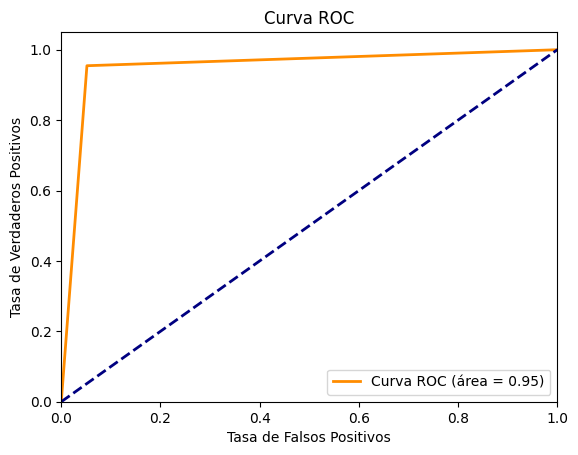

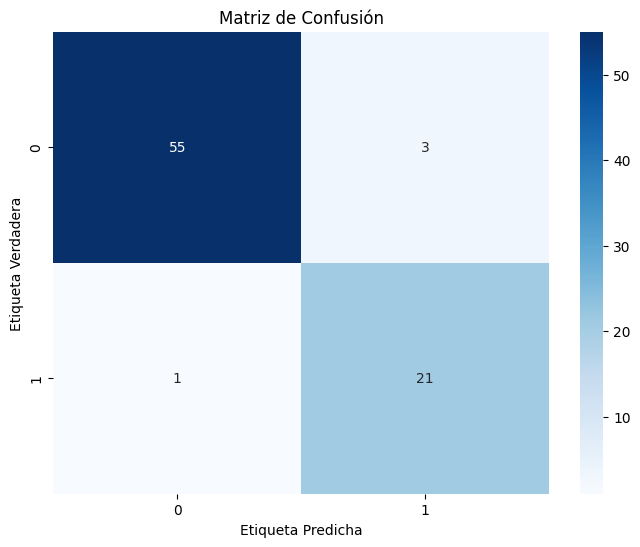

In [35]:
metrics = ClassificationMetrics(y_test, y_pred, model=classifier, clases=[0, 1])

# Calcular y mostrar las métricas
metrics.print_metrics_summary()
plt_curvaROC(metrics)
plt_matriz_confusion(metrics)

### Aplicando red neuronal artificial

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# data = pd.read_csv("Social_Network_Ads.csv")

# # Seleccionar características y etiquetas
# X = data.iloc[:, 2:4].values  # Seleccionar Age y EstimatedSalary como características
# y = data.iloc[:, -1].values   # Seleccionar la columna Purchased como etiquetas

# # Dividir el conjunto de datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar la Red Neuronal Artificial (RNA)
rna = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
rna.fit(X_train_scaled, y_train)

# Predecir etiquetas en el conjunto de prueba
y_pred_rna = rna.predict(X_test_scaled)

# # Calcular la curva ROC para la RNA
# fpr_rna, tpr_rna, _ = roc_curve(y_test, y_pred_rna)
# roc_auc_rna = auc(fpr_rna, tpr_rna)

# # Función para graficar la curva ROC
# def plot_roc_curve(fpr, tpr, roc_auc):
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('Tasa de Falsos Positivos')
#     plt.ylabel('Tasa de Verdaderos Positivos')
#     plt.title('Curva ROC - Red Neuronal Artificial')
#     plt.legend(loc="lower right")
#     plt.show()

# # Mostrar la curva ROC de la RNA
# plot_roc_curve(fpr_rna, tpr_rna, roc_auc_rna)

Matriz de Confusión:
[[55  3]
 [ 1 21]]
Precisión: 0.95
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

Área Bajo la Curva ROC: 0.95141065830721
Área Bajo la Curva PR: 0.8477272727272727
F1-Score: 0.9130434782608695
Exactitud Balanceada: 0.95141065830721
Coeficiente Kappa de Cohen: 0.8780487804878049
Curva de Calibración:
(array([0.01785714, 0.875     ]), array([0., 1.]))
Sensibilidad: 0.9545454545454546
Especificidad: -0.051724137931034475
Divergencia de Kullback-Leibler: 0.001513078191022723
Índice J: 0.84
Curva ROC:
(array([0.        , 0.05172414, 1.        ]), array([0.        , 0.95454545, 1.        ]), 0.95141065830721)


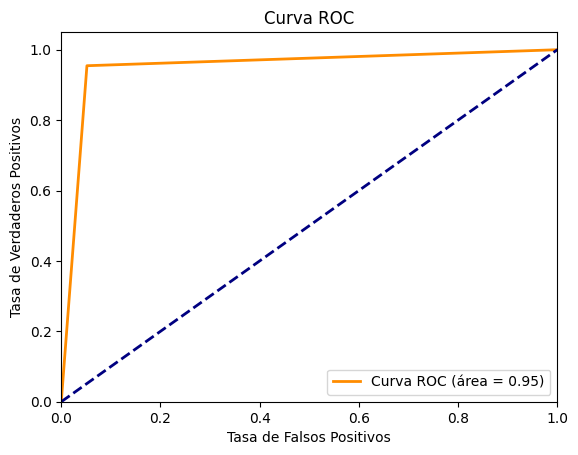

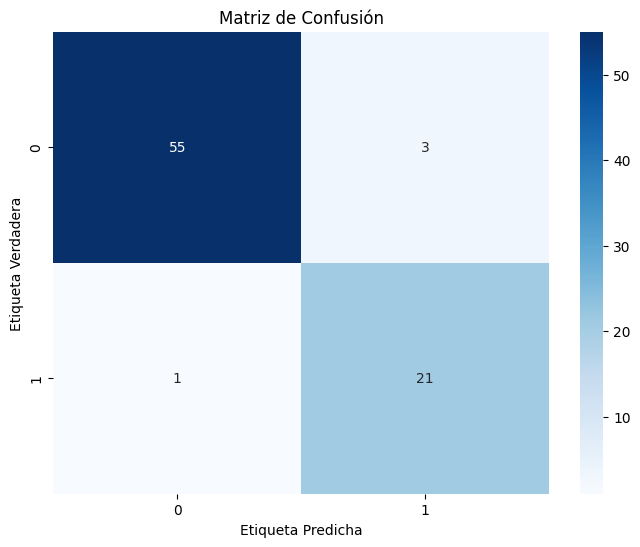

In [41]:
rna_metrics = ClassificationMetrics(y_test, y_pred, model=classifier, clases=[0, 1])

# Calcular y mostrar las métricas
rna_metrics.print_metrics_summary()
plt_curvaROC(rna_metrics)
plt_matriz_confusion(rna_metrics)

Alfin el Fin delfin

In [44]:
print("y si se pregunta porque lo hice tarde, recien estoy aprendiendo IA")

y si se pregunta porque lo hice tarde, recien estoy aprendiendo IA


In [ ]:
perint("Si revisan los deberes")